In [1]:
import h5py
import numpy as np
import cv2

#save_dir = 'C:/Users/rayne/Shock Data/'
save_dir = 'C:/Users/rayne/Shock Data/'

with h5py.File('TD_TC090-078_GXD_CAMERA-01-DB_SHOT_RAW-DIAGNOSTIC-IMAGE_N220223-003-999.h5', 'r') as hf:
    imagename = 'prelim_data.jpg'
    # get an array from the imagename dataset:
    IMAGE_arr = hf['image'][imagename][()]
    # create image from array
    cv2.imwrite(f"{save_dir}/{imagename}", IMAGE_arr)
    # post image to a window
    cv2.imshow(f'Image: {imagename}', IMAGE_arr)
    # keep window posted for 2500 msec
    cv2.waitKey(2500)
    # destroy CV2 window when done
    cv2.destroyAllWindows()

KeyError: "Unable to synchronously open object (object 'image' doesn't exist)"

In [4]:
import h5py
import numpy as np
import cv2

with h5py.File('TD_TC090-078_GXD_CAMERA-01-DB_SHOT_RAW-DIAGNOSTIC-IMAGE_N220223-003-999.h5', "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]
    b_group_key = list(f.keys())[1]
    c_group_key = list(f.keys())[2]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 
    print(type(f[b_group_key])) 
    print(type(f[c_group_key])) 

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    attributes_list = list(f[a_group_key])
    print(attributes_list)
    attributes = f.get('ATTRIBUTES')

    categories_list = list(f[b_group_key])
    print(categories_list)
    categories = f.get('METADATA_CATEGORIES')

    urn_list = list(f[c_group_key])
    print(urn_list)
    urn = f.get('URN')

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    #ds_arr = f[a_group_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['ATTRIBUTES', 'METADATA_CATEGORIES', 'URN']>
<class 'h5py._hl.group.Group'>
<class 'h5py._hl.group.Group'>
<class 'h5py._hl.dataset.Dataset'>
items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (13 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (1 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
['ATTENUATION_CCD', 'BINNING', 'CAMERA_TEMPERATURE_WF', 'DATA_BIT_PRECISION', 'PRESHOT_IMAGESPRESHOT_IMAGES', 'PRESHOT_IMAGES_DTTM', 'PRE_SETTINGS_SIGNATURES', 'SHOT_IMAGE', 'SHOT_IMAGE_DTTM', 'SHOT_SETTINGS_SIGNATURE', 'SIGNATURE_SOURCE', 'SIGNATURE_TYPE', 'TIME_UOM']
['NATURAL_KEY']
[b'urn:llnl.gov:nif:archive:eaa4f946-4782-4527-a35b-ab3d1c665c05']


items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (13 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (1 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
items in the ATTRIBUTES directory: [('ATTENUATION_CCD', <HDF5 dataset "ATTENUATION_CCD": shape (1,), type "<i8">), ('BINNING', <HDF5 dataset "BINNING": shape (1,), type "|S3">), ('CAMERA_TEMPERATURE_WF', <HDF5 group "/ATTRIBUTES/CAMERA_TEMPERATURE_WF" (1 members)>), ('DATA_BIT_PRECISION', <HDF5 dataset "DATA_BIT_PRECISION": shape (1,), type "<i4">), ('PRESHOT_IMAGESPRESHOT_IMAGES', <HDF5 group "/ATTRIBUTES/PRESHOT_IMAGESPRESHOT_IMAGES" (1 members)>), ('PRESHOT_IMAGES_DTTM', <HDF5 dataset "PRESHOT_IMAGES_DTTM": shape (1,), type "<i8">), ('PRE_SETTINGS_SIGNATURES', <HDF5 dataset "PRE_SETTINGS_SIGNATURES": shape (1,), type "<i8">), ('SHOT_IMAGE', <HDF5 group "/ATTRIBUTES/SHOT_IMAGE" (1 members)>), ('SHOT_IMAGE_DTTM', <HDF5 dataset "SHOT_IMAGE_DTTM": shape (1,), type "<i8">), 

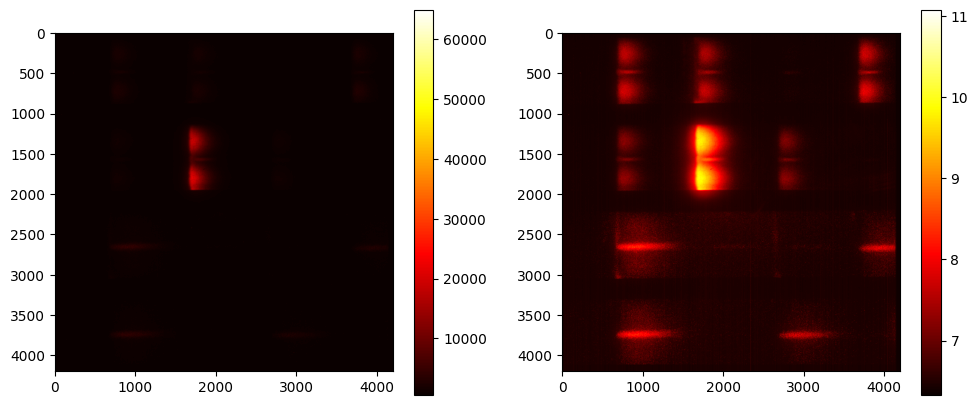

In [6]:
import h5py
import numpy as np
import cv2

with h5py.File('TD_TC090-078_GXD_CAMERA-01-DB_SHOT_RAW-DIAGNOSTIC-IMAGE_N220223-003-999.h5', "r") as f:

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/SHOT_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    print(type(shot_data))

    data_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_LABEL')
    data_label = np.array(data_label)
    print(type(data_label))

    x_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    x_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_LABEL')
    x_label = np.array(x_label)
    print(type(x_label))

    data_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_UNITS')
    data_units = np.array(data_units)
    print(type(data_units))
    print(data_units)

    title = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/TITLE')
    title = np.array(title)
    print(type(title))

    x_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_UNITS')
    x_units = np.array(x_units)
    print(type(x_units))
    print(x_units)

    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    import matplotlib.pyplot as plt
    im1 = axs[0].imshow(shot_data, cmap='hot')
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')
    axs[0].set_title('')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow(np.log(shot_data), cmap='hot')
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].set_title('')
    plt.colorbar(im2, ax=axs[1], label='')



items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (13 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (1 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
items in the ATTRIBUTES directory: [('ATTENUATION_CCD', <HDF5 dataset "ATTENUATION_CCD": shape (1,), type "<i8">), ('BINNING', <HDF5 dataset "BINNING": shape (1,), type "|S3">), ('CAMERA_TEMPERATURE_WF', <HDF5 group "/ATTRIBUTES/CAMERA_TEMPERATURE_WF" (1 members)>), ('DATA_BIT_PRECISION', <HDF5 dataset "DATA_BIT_PRECISION": shape (1,), type "<i4">), ('PRESHOT_IMAGESPRESHOT_IMAGES', <HDF5 group "/ATTRIBUTES/PRESHOT_IMAGESPRESHOT_IMAGES" (1 members)>), ('PRESHOT_IMAGES_DTTM', <HDF5 dataset "PRESHOT_IMAGES_DTTM": shape (1,), type "<i8">), ('PRE_SETTINGS_SIGNATURES', <HDF5 dataset "PRE_SETTINGS_SIGNATURES": shape (1,), type "<i8">), ('SHOT_IMAGE', <HDF5 group "/ATTRIBUTES/SHOT_IMAGE" (1 members)>), ('SHOT_IMAGE_DTTM', <HDF5 dataset "SHOT_IMAGE_DTTM": shape (1,), type "<i8">), 

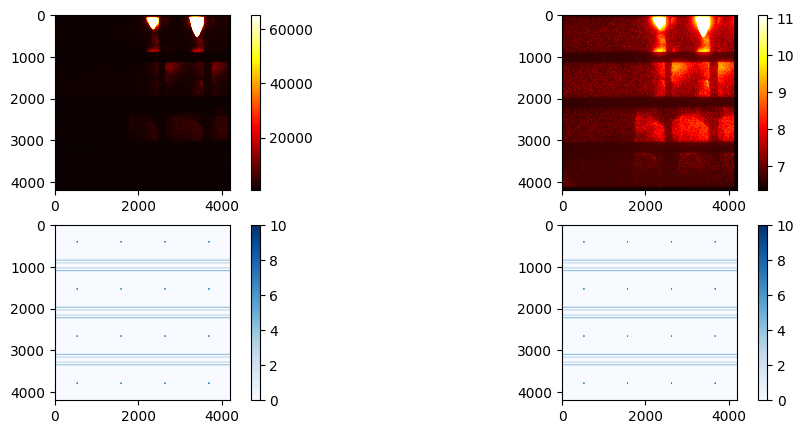

In [24]:
import h5py
import numpy as np
import cv2

with h5py.File('TD_TC090-078_GXD_CAMERA-01-DB_SHOT_RAW-DIAGNOSTIC-IMAGE_N241228-001-999.h5', "r") as f:

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/SHOT_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    print(type(shot_data))
    print(np.shape(shot_data))

    data_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_LABEL')
    data_label = np.array(data_label)
    print(type(data_label))

    x_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    x_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_LABEL')
    x_label = np.array(x_label)
    print(type(x_label))

    data_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_UNITS')
    data_units = np.array(data_units)
    print(type(data_units))
    print(data_units)

    title = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/TITLE')
    title = np.array(title)
    print(type(title))

    x_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_UNITS')
    x_units = np.array(x_units)
    print(type(x_units))
    print(x_units)

    import matplotlib.pyplot as plt

    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 5))

    j = 1

    im_plot = shot_data[1050*(j-1):1050*j,:]

    #shot_data[1050*(j-1):1050*j,:] = 0.1*shot_data[1050*(j-1):1050*j,:]

    #shot_data = 0.33*shot_data

    #im1 = axs[0].imshow(im_plot, cmap='hot', origin='lower', vmin=0, vmax=80000)
    im1 = axs[0,0].imshow(shot_data, cmap='hot')
    axs[0,0].set_xlabel('')
    axs[0,0].set_ylabel('')
    axs[0,0].set_title('')
    plt.colorbar(im1, ax=axs[0,0], label='')

    #im2 = axs[1].imshow(np.log(im_plot), cmap='hot', origin='lower', vmin=6, vmax=12)
    im2 = axs[0,1].imshow(np.log(shot_data), cmap='hot')
    axs[0,1].set_xlabel('')
    axs[0,1].set_ylabel('')
    axs[0,1].set_title('')
    plt.colorbar(im2, ax=axs[0,1], label='')

d=15

crosshair = np.zeros((4200,4200))
for i in range(0,4):
    for j in range(0,4):
        crosshair[-d+404+1130*i:d+404+1130*i, -d+527+1049*j:d+527+1049*j] = 10

d=10

crosshair[-d+504+404+1130*0:d+504+404+1130*0,:] = 4
  
crosshair[-d-504+404+1130*1:d-504+404+1130*1,:] = 4

crosshair[-d+504+404+1130*1:d+504+404+1130*1,:] = 4
  
crosshair[-d-504+404+1130*2:d-504+404+1130*2,:] = 4

crosshair[-d+504+404+1130*2:d+504+404+1130*2,:] = 4
  
crosshair[-d-504+404+1130*3:d-504+404+1130*3,:] = 4

crosshair[-d+504+404+1130*3:d+504+404+1130*3,:] = 4
  
crosshair[-d-504+404+1130*4:d-504+404+1130*4,:] = 4



crosshair[-d+438+404+1130*0:d+438+404+1130*0,:] = 6
  
crosshair[-d-438+404+1130*1:d-438+404+1130*1,:] = 6

crosshair[-d+438+404+1130*1:d+438+404+1130*1,:] = 6
  
crosshair[-d-438+404+1130*2:d-438+404+1130*2,:] = 6

crosshair[-d+438+404+1130*2:d+438+404+1130*2,:] = 6
  
crosshair[-d-438+404+1130*3:d-438+404+1130*3,:] = 6

crosshair[-d+438+404+1130*3:d+438+404+1130*3,:] = 6
  
crosshair[-d-438+404+1130*4:d-438+404+1130*4,:] = 6


im3 = axs[1,0].imshow(crosshair, cmap = 'Blues')
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('')
axs[1,0].set_title('')
plt.colorbar(im3, ax=axs[1,0], label='')

im4 = axs[1,1].imshow(crosshair, cmap = 'Blues')
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')
axs[1,1].set_title('')
plt.colorbar(im4, ax=axs[1,1], label='')



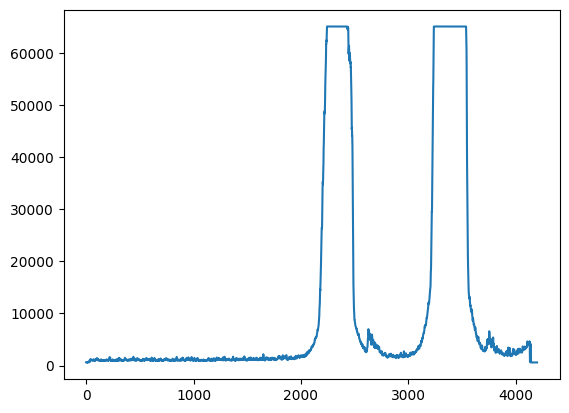

In [25]:
def lineout(array, w1, w2):
    width = np.shape(array)[0]
    length = np.shape(array)[1]
    line_data = array[w2,:]
    for i in range(w1,w2):
        line_data = np.add(line_data,array[i,:])
    line_data = (1/(w2+1-w1))*line_data
    return line_data

line = lineout(shot_data, 100, 200)
plt.plot(line)

In [5]:
import numpy as np
np.shape(shot_data)[1]

4200

items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (13 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (1 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
items in the ATTRIBUTES directory: [('ATTENUATION_CCD', <HDF5 dataset "ATTENUATION_CCD": shape (1,), type "<i8">), ('BINNING', <HDF5 dataset "BINNING": shape (1,), type "|S3">), ('CAMERA_TEMPERATURE_WF', <HDF5 group "/ATTRIBUTES/CAMERA_TEMPERATURE_WF" (1 members)>), ('DATA_BIT_PRECISION', <HDF5 dataset "DATA_BIT_PRECISION": shape (1,), type "<i4">), ('PRESHOT_IMAGESPRESHOT_IMAGES', <HDF5 group "/ATTRIBUTES/PRESHOT_IMAGESPRESHOT_IMAGES" (1 members)>), ('PRESHOT_IMAGES_DTTM', <HDF5 dataset "PRESHOT_IMAGES_DTTM": shape (1,), type "<i8">), ('PRE_SETTINGS_SIGNATURES', <HDF5 dataset "PRE_SETTINGS_SIGNATURES": shape (1,), type "<i8">), ('SHOT_IMAGE', <HDF5 group "/ATTRIBUTES/SHOT_IMAGE" (1 members)>), ('SHOT_IMAGE_DTTM', <HDF5 dataset "SHOT_IMAGE_DTTM": shape (1,), type "<i8">), 

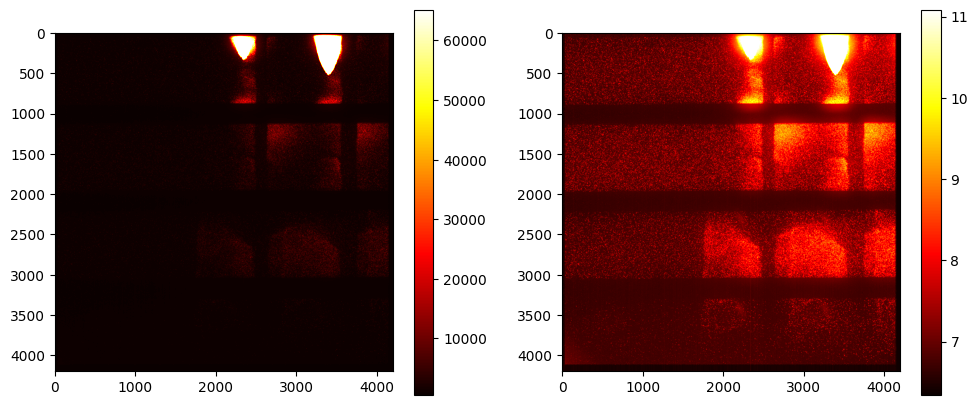

In [5]:
import h5py
import numpy as np
import cv2

with h5py.File('TD_TC090-078_GXD_CAMERA-01-DB_SHOT_RAW-DIAGNOSTIC-IMAGE_N241228-001-999.h5', "r") as f:

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/SHOT_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    print(type(shot_data))

    data_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_LABEL')
    data_label = np.array(data_label)
    print(type(data_label))

    x_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    x_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_LABEL')
    x_label = np.array(x_label)
    print(type(x_label))

    data_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_UNITS')
    data_units = np.array(data_units)
    print(type(data_units))
    print(data_units)

    title = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/TITLE')
    title = np.array(title)
    print(type(title))

    x_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_UNITS')
    x_units = np.array(x_units)
    print(type(x_units))
    print(x_units)

    import matplotlib.pyplot as plt

    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    j = 1

    im_plot = shot_data[1050*(j-1):1050*j,:]

    #shot_data[1050*(j-1):1050*j,:] = 0.1*shot_data[1050*(j-1):1050*j,:]

    #shot_data = 0.33*shot_data

    #im1 = axs[0].imshow(im_plot, cmap='hot', origin='lower', vmin=0, vmax=80000)
    im1 = axs[0].imshow(shot_data, cmap='hot')
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')
    axs[0].set_title('')
    plt.colorbar(im1, ax=axs[0], label='')

    #im2 = axs[1].imshow(np.log(im_plot), cmap='hot', origin='lower', vmin=6, vmax=12)
    im2 = axs[1].imshow(np.log(shot_data), cmap='hot')
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].set_title('')
    plt.colorbar(im2, ax=axs[1], label='')




items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (3 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (2 members)>), ('PEDIGREE', <HDF5 group "/PEDIGREE" (3 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
items in the ATTRIBUTES directory: [('CALIB_SWEEP_DURATION', <HDF5 dataset "CALIB_SWEEP_DURATION": shape (1,), type "<f8">), ('CORR_IMAGE', <HDF5 group "/ATTRIBUTES/CORR_IMAGE" (1 members)>), ('SWEEP_DURATION_UOM', <HDF5 dataset "SWEEP_DURATION_UOM": shape (1,), type "|S2">)]
items in the SHOT_IMAGE directory: [('DATA', <HDF5 group "/ATTRIBUTES/CORR_IMAGE/DATA" (10 members)>)]
items in the SHOT_IMAGE directory: [('DATA', <HDF5 dataset "DATA": shape (1365, 1365), type "<f4">), ('DATA_LABEL', <HDF5 dataset "DATA_LABEL": shape (), type "|S10">), ('DATA_UNITS', <HDF5 dataset "DATA_UNITS": shape (), type "|S7">), ('TITLE', <HDF5 dataset "TITLE": shape (), type "|S21">), ('X_AXIS', <HDF5 dataset "X_AXIS": shape (1365,), type "<f

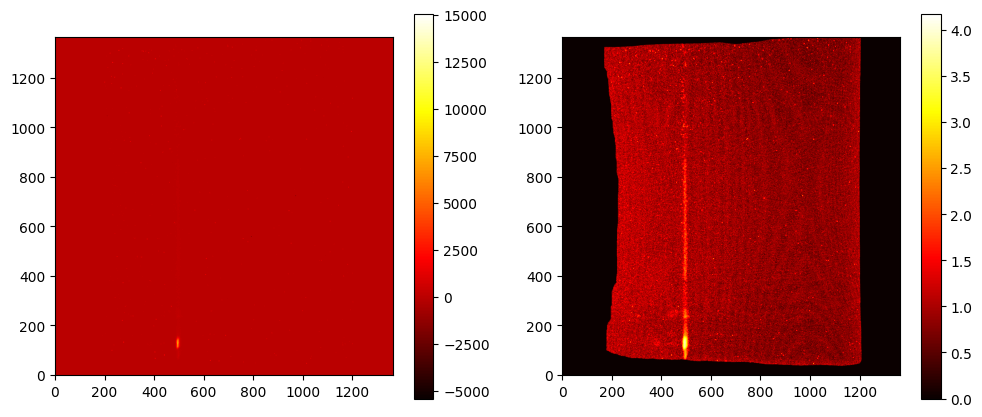

In [6]:
import h5py
import numpy as np
import cv2

with h5py.File('OTS_29.h5', "r") as f:

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/CORR_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/CORR_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/CORR_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    print(type(shot_data))

    data_label = f.get('/ATTRIBUTES/CORR_IMAGE/DATA/DATA_LABEL')
    data_label = np.array(data_label)
    print(type(data_label))

    x_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    x_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_LABEL')
    x_label = np.array(x_label)
    print(type(x_label))

    data_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_UNITS')
    data_units = np.array(data_units)
    print(type(data_units))
    print(data_units)

    title = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/TITLE')
    title = np.array(title)
    print(type(title))

    x_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_UNITS')
    x_units = np.array(x_units)
    print(type(x_units))
    print(x_units)
    #print(x_axis)
    #print(y_axis)

    import matplotlib.pyplot as plt

    print(shot_data)

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')
    axs[0].set_title('')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data)+1), cmap='hot', origin='lower')
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].set_title('')
    plt.colorbar(im2, ax=axs[1], label='')



items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (19 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (1 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
items in the ATTRIBUTES directory: [('CAMPAIGN_SHOT_ID', <HDF5 dataset "CAMPAIGN_SHOT_ID": shape (1,), type "|S26">), ('FILE_TYPE', <HDF5 dataset "FILE_TYPE": shape (1,), type "|S14">), ('IMAGE_HEIGHT', <HDF5 dataset "IMAGE_HEIGHT": shape (1,), type "<i4">), ('IMAGE_PLATE_SERIAL', <HDF5 dataset "IMAGE_PLATE_SERIAL": shape (1,), type "|S8">), ('IMAGE_PLATE_TYPE', <HDF5 dataset "IMAGE_PLATE_TYPE": shape (1,), type "|S15">), ('IMAGE_WIDTH', <HDF5 dataset "IMAGE_WIDTH": shape (1,), type "<i4">), ('LATITUDE', <HDF5 dataset "LATITUDE": shape (1,), type "<i4">), ('OPERATOR', <HDF5 dataset "OPERATOR": shape (1,), type "|S2">), ('OPERATOR_COMMENT', <HDF5 dataset "OPERATOR_COMMENT": shape (1,), type "|S93">), ('PIXEL_DEPTH', <HDF5 dataset "PIXEL_DEPTH": shape (1,), type "<i4">), ('P

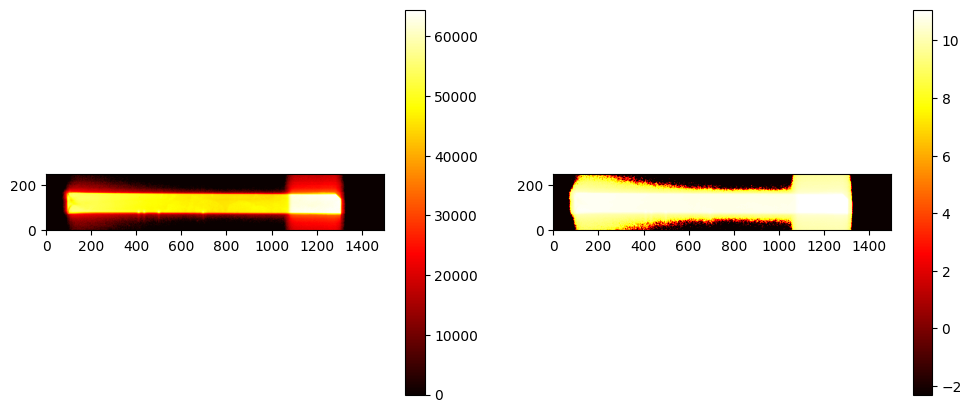

In [73]:
import h5py
import numpy as np
import cv2

with h5py.File('TD_TC000-000_NEPPS_IMAGE-PLATE-1_SCAN-H_RAW-IMAGE-PLATE_N241229-001-999.h5', "r") as f:

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PLATE_IMG')
    shot_image_list = list(shot_image_folder.items())
    print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PLATE_IMG/DATA')
    shot_data_list = list(shot_data_folder.items())
    print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PLATE_IMG/DATA/DATA')
    shot_data = np.array(shot_data)
    print(type(shot_data))

    data_label = f.get('/ATTRIBUTES/PLATE_IMG/DATA/DATA_LABEL')
    data_label = np.array(data_label)
    print(type(data_label))

    x_axis = f.get('/ATTRIBUTES/PLATE_IMG/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PLATE_IMG/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    x_label = f.get('/ATTRIBUTES/PLATE_IMG/DATA/X_LABEL')
    x_label = np.array(x_label)
    print(type(x_label))

    data_units = f.get('/ATTRIBUTES/PLATE_IMG/DATA/DATA_UNITS')
    data_units = np.array(data_units)
    print(type(data_units))
    print(data_units)

    title = f.get('/ATTRIBUTES/PLATE_IMG/DATA/TITLE')
    title = np.array(title)
    print(type(title))

    x_units = f.get('/ATTRIBUTES/PLATE_IMG/DATA/X_UNITS')
    x_units = np.array(x_units)
    print(type(x_units))
    print(x_units)
    #print(x_axis)
    #print(y_axis)

    import matplotlib.pyplot as plt

    print(shot_data)

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')
    axs[0].set_title('')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow(np.log(np.abs(shot_data)+0.1), cmap='hot', origin='lower')
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].set_title('')
    plt.colorbar(im2, ax=axs[1], label='')

    NEPPS_1 = shot_data
    x1_axis = x_axis


(250, 1500)
(1500,)
(1500,)


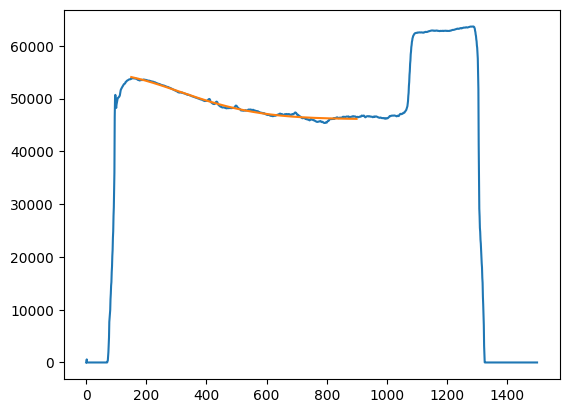

In [84]:
import numpy as np

def lineout(array, w1, w2):
    width = np.shape(array)[0]
    length = np.shape(array)[1]
    line_data = array[w2,:]
    for i in range(length):
        line_data[i] = (1/(w2+1-w1))*np.sum(array[w1:w2+1,i])
    return line_data

print(np.shape(NEPPS_1))
line = lineout(NEPPS_1, 80, 150)
plt.plot(x0_axis,line)
print(np.shape(line))
print(np.shape(x0_axis))
np.min(line[400:1200])
#plt.plot(shot_data[:,1000])
#print(x_units)

from scipy.optimize import curve_fit

def gaussian_H(v, A, vth, vd, o):
    p = 2
    vdf_unnormalized = np.exp(-np.abs((v - vd)  / (vth)) ** p)
    vdf =  vdf_unnormalized / np.trapz(vdf_unnormalized, v)
    return A*vdf+o

#plt.plot(x0_axis,gaussian_H(x0_axis,3000000,300,150,46000))

gauss_i, pcov_i = curve_fit(gaussian_H, x0_axis[150:900], line[150:900], p0=[3000000,300,150,46000])

fitted_gauss_i = gaussian_H(x0_axis[150:900], gauss_i[0], gauss_i[1], gauss_i[2], gauss_i[3])

plt.plot(x0_axis[150:900],fitted_gauss_i)

items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (6 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (2 members)>), ('PEDIGREE', <HDF5 group "/PEDIGREE" (2 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
items in the ATTRIBUTES directory: [('FADE_CORRECTION_TIME', <HDF5 dataset "FADE_CORRECTION_TIME": shape (1,), type "<f8">), ('FADE_CORRECTION_TIME_UOM', <HDF5 dataset "FADE_CORRECTION_TIME_UOM": shape (1,), type "|S7">), ('FADE_TIME', <HDF5 dataset "FADE_TIME": shape (1,), type "<f8">), ('FADE_TIME_UOM', <HDF5 dataset "FADE_TIME_UOM": shape (1,), type "|S1">), ('PSL_FADE_CORR_IMAGE', <HDF5 group "/ATTRIBUTES/PSL_FADE_CORR_IMAGE" (1 members)>), ('PSL_IMAGE', <HDF5 group "/ATTRIBUTES/PSL_IMAGE" (1 members)>)]
items in the PLATE_IMG directory: [('DATA', <HDF5 group "/ATTRIBUTES/PSL_IMAGE/DATA" (10 members)>)]
items in the PLATE_IMG directory: [('DATA', <HDF5 dataset "DATA": shape (250, 1500), type "<f4">), ('DATA_LABEL', <HD

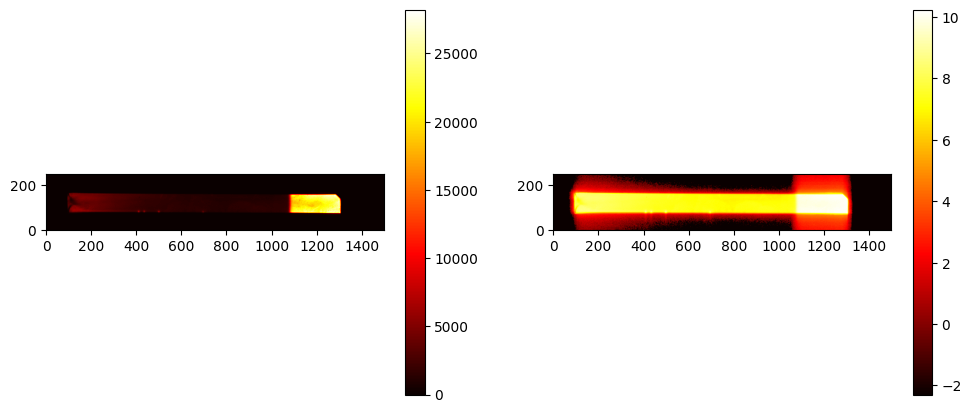

In [72]:
import h5py
import numpy as np
import cv2

with h5py.File('TD_TC000-000_NEPPS_IMAGE-PLATE-1_SCAN-H_IMAGE-PLATE-CORR_N241229-001-999.h5', "r") as f:

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PSL_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PSL_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    print(type(shot_data))

    data_label = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA_LABEL')
    data_label = np.array(data_label)
    print(type(data_label))

    x_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    x_label = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_LABEL')
    x_label = np.array(x_label)
    print(type(x_label))

    data_units = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA_UNITS')
    data_units = np.array(data_units)
    print(type(data_units))
    print(data_units)

    title = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/TITLE')
    title = np.array(title)
    print(type(title))

    x_units = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_UNITS')
    x_units = np.array(x_units)
    print(type(x_units))
    print(x_units)
    #print(x_axis)
    #print(y_axis)

    import matplotlib.pyplot as plt

    print(shot_data)

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')
    axs[0].set_title('')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow(np.log(np.abs(shot_data)+0.1), cmap='hot', origin='lower')
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].set_title('')
    plt.colorbar(im2, ax=axs[1], label='')

NEPPS_0 = shot_data
x0_axis = x_axis

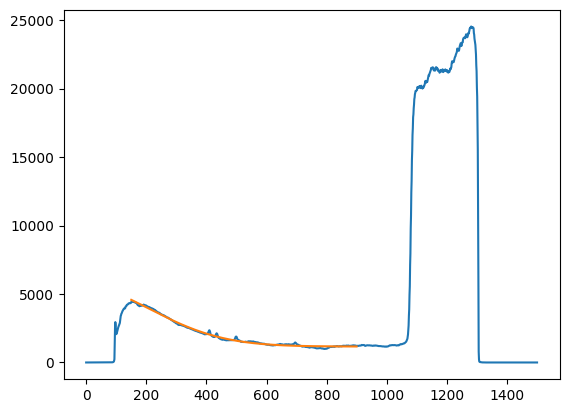

In [68]:
import numpy as np

def lineout(array, w1, w2):
    width = np.shape(array)[0]
    length = np.shape(array)[1]
    line_data = array[w2,:]
    for i in range(length):
        line_data[i] = (1/(w2+1-w1))*np.sum(array[w1:w2+1,i])
    return line_data

line = lineout(NEPPS_0, 80, 150)
plt.plot(x0_axis,line)
np.min(line[400:1200])
#plt.plot(shot_data[:,1000])
#print(x_units)

from scipy.optimize import curve_fit

def gaussian_H(v, A, vth, vd, o):
    p = 2
    vdf_unnormalized = np.exp(-np.abs((v - vd)  / (vth)) ** p)
    vdf =  vdf_unnormalized / np.trapz(vdf_unnormalized, v)
    return A*vdf+o

#plt.plot(x_axis,gaussian_H(x_axis,1300000,250,150,1000))

gauss_i, pcov_i = curve_fit(gaussian_H, x0_axis[150:900], line[150:900], p0=[1300000,250,150,1000])

fitted_gauss_i = gaussian_H(x0_axis[150:900], gauss_i[0], gauss_i[1], gauss_i[2], gauss_i[3])

plt.plot(x0_axis[150:900],fitted_gauss_i)

items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (6 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (2 members)>), ('PEDIGREE', <HDF5 group "/PEDIGREE" (2 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
items in the ATTRIBUTES directory: [('FADE_CORRECTION_TIME', <HDF5 dataset "FADE_CORRECTION_TIME": shape (1,), type "<f8">), ('FADE_CORRECTION_TIME_UOM', <HDF5 dataset "FADE_CORRECTION_TIME_UOM": shape (1,), type "|S7">), ('FADE_TIME', <HDF5 dataset "FADE_TIME": shape (1,), type "<f8">), ('FADE_TIME_UOM', <HDF5 dataset "FADE_TIME_UOM": shape (1,), type "|S1">), ('PSL_FADE_CORR_IMAGE', <HDF5 group "/ATTRIBUTES/PSL_FADE_CORR_IMAGE" (1 members)>), ('PSL_IMAGE', <HDF5 group "/ATTRIBUTES/PSL_IMAGE" (1 members)>)]
items in the PLATE_IMG directory: [('DATA', <HDF5 group "/ATTRIBUTES/PSL_IMAGE/DATA" (6 members)>)]
items in the PLATE_IMG directory: [('DATA', <HDF5 dataset "DATA": shape (250, 1500), type "<f4">), ('DATA_LABEL', <HDF

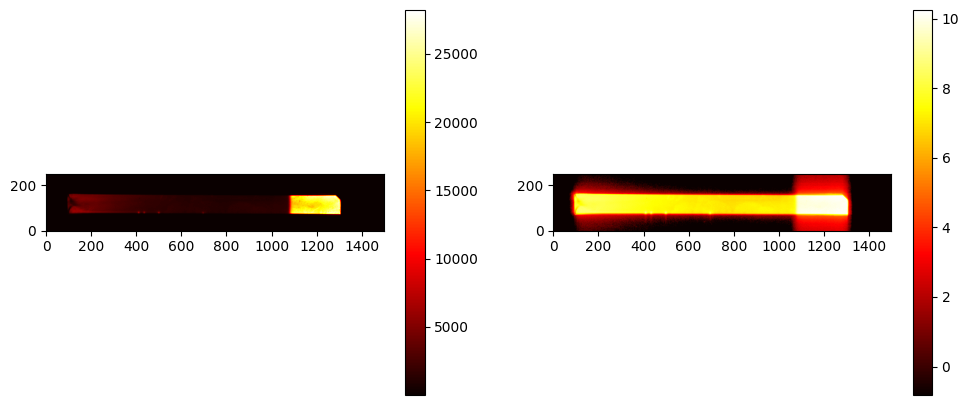

In [34]:
import h5py
import numpy as np
import cv2

with h5py.File('TD_TC000-000_NEPPS_IMAGE-PLATE-1_SCAN-H_IP-CORRECTIONS_N241229-001-999.h5', "r") as f:

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PSL_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PSL_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    print(type(shot_data))

    data_label = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA_LABEL')
    data_label = np.array(data_label)
    print(type(data_label))

    x_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    x_label = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_LABEL')
    x_label = np.array(x_label)
    print(type(x_label))

    data_units = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA_UNITS')
    data_units = np.array(data_units)
    print(type(data_units))
    print(data_units)

    title = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/TITLE')
    title = np.array(title)
    print(type(title))

    x_units = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_UNITS')
    x_units = np.array(x_units)
    print(type(x_units))
    print(x_units)
    #print(x_axis)
    #print(y_axis)

    import matplotlib.pyplot as plt

    print(shot_data)

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')
    axs[0].set_title('')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow(np.log(np.abs(shot_data)+0.1), cmap='hot', origin='lower')
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].set_title('')
    plt.colorbar(im2, ax=axs[1], label='')

